In [1]:
import numpy as np
import matplotlib.pyplot as plt

import utilities

# Load input data
input_file = 'data_multivar.txt'
X, y = utilities.load_data(input_file)

In [2]:
# Separate the data into classes
class_0 = np.array([X[i] for i in range(len(X)) if y[i]==0])
class_1 = np.array([X[i] for i in range(len(X)) if y[i]==1])

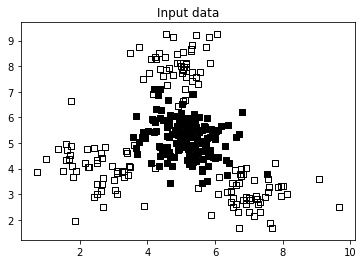

In [3]:
# Plot the data
plt.figure()
plt.scatter(class_0[:,0], class_0[:,1], facecolors='black', edgecolors='black', marker='s')
plt.scatter(class_1[:,0], class_1[:,1], facecolors='None', edgecolors='black', marker='s')
plt.title('Input data')
plt.show()

In [ ]:
## 